In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
books=pd.read_csv('data/Books.csv',sep=';',encoding='latin-1')
books.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   Title      271379 non-null  object
 2   Author     271377 non-null  object
 3   Year       271379 non-null  int64 
 4   Publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [2]:
users=pd.read_csv('data/Users.csv',sep=';',encoding='latin-1')
ratings=pd.read_csv('data/Ratings.csv',sep=';',encoding='latin-1')
users.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_1700\3338083483.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users=pd.read_csv('data/Users.csv',sep=';',encoding='latin-1')


,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


In [3]:
ratings.head()

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
print(ratings.shape)
print(users.shape)
print(books.shape)

(1149780, 3)
(278859, 2)
(271379, 5)


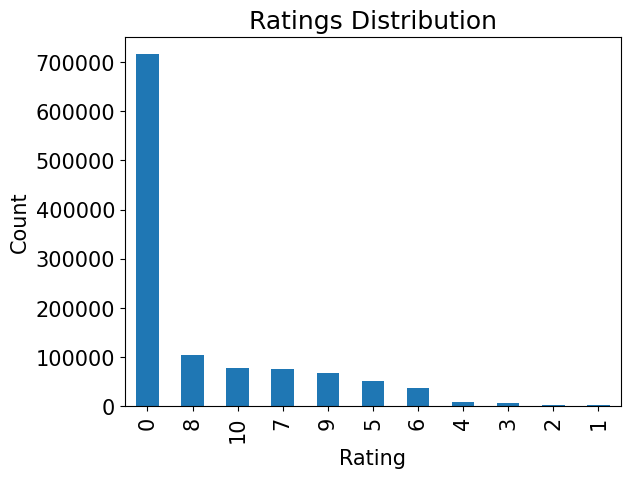

In [5]:
plt.rc("font",size=15)
ratings.Rating.value_counts(sort=True).plot(kind='bar')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel('Count')
plt.savefig("ratings.png")
plt.show()

In [6]:
users.Age.value_counts()

Age
24             5651
25             5594
26             5525
23             5433
27             5361
               ... 
 perak            1
 new jersey       1
 qatar            1
 isulan           1
127               1
Name: count, Length: 311, dtype: int64

In [7]:
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
users = users.dropna(subset=['Age'])
users['Age'] = users['Age'].astype(int)

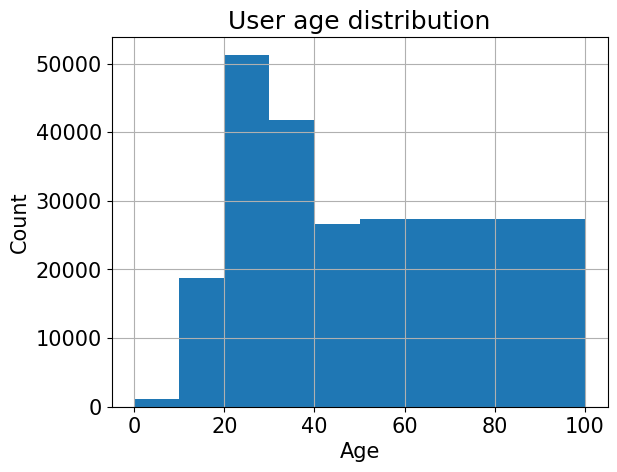

In [8]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title("User age distribution")
plt.xlabel("Age")
plt.ylabel('Count')
plt.savefig("Age_hist.png",bbox_inches="tight")
plt.show()

Recommendations based on Raying count


In [9]:
rating_count=pd.DataFrame(ratings.groupby('ISBN')['Rating'].count())

rating_count.sort_values(by='Rating',ascending=False).head()

,Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


Book with ISBN number '0971880107' has number of ratings 

In [16]:
books[books['ISBN']=='0971880107']

,ISBN,Title,Author,Year,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far


In [17]:
most_rated_books=pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],index=np.arange(5),columns=['ISBN'])
most_rated_summary=pd.merge(most_rated_books,books,on='ISBN')
most_rated_summary

,ISBN,Title,Author,Year,Publisher
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA


#### Correlation based recommendations


In [22]:
average_rating=pd.DataFrame(ratings.groupby('ISBN')['Rating'].mean())
average_rating['ratingCount']=pd.DataFrame(ratings.groupby('ISBN')['Rating'].count())

average_rating.sort_values(by='ratingCount',ascending=False).head()

,Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Here the most rated book does is not at all highly rated therefore recommendations based on rating count can be misleading 

We'll consider the books which have more than 100 ratings and users with more than 200 ratings

In [23]:
count1=ratings['User-ID'].value_counts()
ratings=ratings[ratings['User-ID'].isin(count1[count1>=200].index)]

count2=ratings['Rating'].value_counts()
ratings=ratings[ratings['Rating'].isin(count2[count2>=100].index)]

ratings.head()

,User-ID,ISBN,Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


let's convert it  into a pivot table


In [24]:
ratings_pivot=ratings.pivot(index='User-ID',columns='ISBN').Rating
userID=ratings_pivot.index
ISBN=ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\""0432534220\""","\""2842053052\""",b00005wz75,cn108465,cn113107,ÃÂ½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
book_rating=ratings_pivot['0316666343']
similar=ratings_pivot.corrwith(book_rating)
corr_books=pd.DataFrame(similar,columns=['pearsonR'])
corr_books.dropna(inplace=True)
corr_summary=corr_books.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR',ascending=False).head(10)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:,

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [30]:
books_having_corr=pd.DataFrame(['0312291639','0316601950','0446610038','0446672211','0385265700','0345342968','0060930535'],
                               index=np.arange(7),columns=['ISBN'])
corr_books=pd.merge(books_having_corr,books,on='ISBN')
corr_books

,ISBN,Title,Author,Year,Publisher
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial


#### Using K-Nearest Neighbors Technique

In [33]:
book_data=pd.merge(ratings,books,on='ISBN')

book_data=book_data.drop(['Author','Publisher','Year'],axis=1)
book_data.head()

,User-ID,ISBN,Rating,Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)


In [34]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488758 entries, 0 to 488757
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  488758 non-null  int64 
 1   ISBN     488758 non-null  object
 2   Rating   488758 non-null  int64 
 3   Title    488758 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.9+ MB


In [38]:
book_data=book_data.dropna(axis=0)
book_rating_count=(book_data.groupby('ISBN')['Rating'].count().reset_index().
             rename(columns={'Rating':'total_Rating_count'}))
book_rating_count.head()

,ISBN,total_Rating_count
0,0000913154,1
1,0001010565,1
2,0001046438,1
3,000104687X,1
4,0001047213,1


In [39]:
book_data_ratcnt=book_data.merge(book_rating_count,left_on='ISBN',right_on='ISBN',how='left')
book_data_ratcnt.head()

,User-ID,ISBN,Rating,Title,total_Rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,80
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,7
2,277427,003008685X,8,Pioneers,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),13


In [40]:
print(book_data_ratcnt['total_Rating_count'].describe())

count    488758.000000
mean         16.083596
std          29.843621
min           1.000000
25%           2.000000
50%           5.000000
75%          16.000000
max         365.000000
Name: total_Rating_count, dtype: float64


In [41]:
ratingcount_thrshold=100
rating_popular_books=book_data_ratcnt.query('total_Rating_count>=@ratingcount_thrshold')
rating_popular_books.head()

,User-ID,ISBN,Rating,Title,total_Rating_count
13,277427,0060930535,0,The Poisonwood Bible: A Novel,133
15,277427,0060934417,0,Bel Canto: A Novel,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108
38,277427,0142001740,0,The Secret Life of Bees,160
56,277427,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,105


In [42]:
rating_popular_books.shape

(13614, 5)

In [44]:
book_summary=rating_popular_books.pivot(index='Title',columns='User-ID',values='Rating').fillna(0)

book_summary.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Map of the World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Prayer for Owen Meany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from scipy.sparse import csr_matrix

book_summary_sparse=csr_matrix(book_summary.values)
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(book_summary_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
query_index=np.random.choice(book_summary.shape[0])
print(query_index)
distances,indices=model.kneighbors(book_summary.iloc[query_index,:].values.reshape(1,-1),n_neighbors=8)



51


In [48]:
book_summary.index[51]

'The Alienist'

In [49]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('recommendation for {0}: \n'.format(book_summary.index[query_index]))
    else:
        print('{0} : {1} with the distance of {2}'.format(i,book_summary.index[indices.flatten()[i]],distances.flatten()[i]))

recommendation for The Alienist: 

1 : Jurassic Park with the distance of 0.8271339526161133
2 : Harry Potter and the Chamber of Secrets (Book 2) with the distance of 0.8311437173237375
3 : The Handmaid's Tale with the distance of 0.8361580413164971
4 : The Divine Secrets of the Ya-Ya Sisterhood: A Novel with the distance of 0.8371353099133818
5 : All I Really Need to Know with the distance of 0.8410801256526559
6 : The Client with the distance of 0.8444617337873848
7 : One for the Money (Stephanie Plum Novels (Paperback)) with the distance of 0.8475568373538271
